# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=5ee7feea5e6e504efc7fa76db408da0e55b2b5490aadc02778c6b9ce87a8cdfe
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images


Computing std: 100%|████████████████████████| 6246/6246 [01:35<00:00, 65.36it/s]


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended. 

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [4]:
!pytest -vv src/data.py -k data_loaders

/bin/sh: 1: pytest: not found


In [5]:
!python -m pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 4.78s ========================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ``` 
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
> 
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> **Answer**: Landmark images were resized to 256 X 256 and then cropped to 244 X 244 in the data transformation stage. Resize, and Cropping method is used. 
We resize/crop the image to a standard size to avoid an imbalance in array length.      

Data augmentation is used to avoid overfitting and increase training dataset variations. Random rotation, horizontal flip, 
color jitter, and random affine methods capture various scenarios of images.

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [7]:
!python -m pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 4.67s ========================


In [6]:
!pytest -vv src/data.py -k visualize_one_batch

/bin/sh: 1: pytest: not found


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
['00.Haleakala_National_Park', '01.Mount_Rainier_National_Park', '02.Ljubljana_Castle', '03.Dead_Sea', '04.Wroclaws_Dwarves', '05.London_Olympic_Stadium', '06.Niagara_Falls', '07.Stonehenge', '08.Grand_Canyon', '09.Golden_Gate_Bridge', '10.Edinburgh_Castle', '11.Mount_Rushmore_National_Memorial', '12.Kantanagar_Temple', '13.Yellowstone_National_Park', '14.Terminal_Tower', '15.Central_Park', '16.Eiffel_Tower', '17.Changdeokgung', '18.Delicate_Arch', '19.Vienna_City_Hall', '20.Matterhorn', '21.Taj_Mahal', '22.Moscow_Raceway', '23.Externsteine', '24.Soreq_Cave', '25.Banff_National_Park', '26.Pont_du_Gard', '27.Seattle_Japanese_Garden', '28.Sydney_Harbour_Bridge', '29.Petronas_Towers', '30.Brooklyn_Bridge', '31.Washington_Monument', '32.Hanging_Temple', '33.Sydney_Opera_House', '34.Great_Barrier_Reef', '35.Monumento_a_la_Revolucion', '36.Badlands_National_Park', '37.Atomium', '

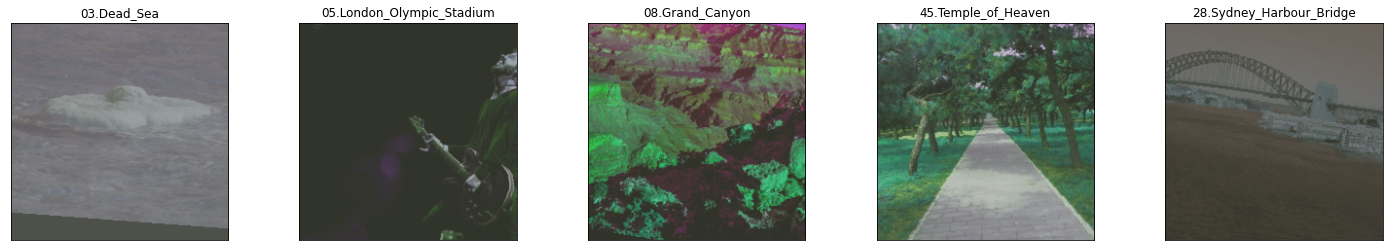

In [2]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders()
print(data_loaders["train"].dataset.classes)
visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [3]:
!pytest -vv src/model.py

/bin/sh: 1: pytest: not found


In [1]:
!python -m pytest -vv src/model.py 

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 9.62s ===============================


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> __Answer:__ To design the model for landmark classification, I added four convolution layers with batch normalization, LeakyRelU activation function, and Maxpool2d function in a set. Kernel size 3X3 is used as a parameter in the convolution function.
After flattening a group of Linear functions followed by batch normalization, dropout, and the LeakyRelu method are used. Dropout is added to avoid overfitting and batch normalization to improve the model’s performance. It’s a fully connected network designed for Landmark classification.


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [4]:
!pytest -vv src/optimization.py -k get_loss

/bin/sh: 1: pytest: not found


In [10]:
!python -m pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.88s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [5]:
!pytest -vv src/optimization.py -k get_optimizer

/bin/sh: 1: pytest: not found


In [11]:
!python -m pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.77s ========================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [1]:
!pytest -vv src/train.py -k train_one_epoch

/bin/sh: 1: pytest: not found


In [12]:
!python -m pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

======================= 1 passed, 3 deselected in 16.34s =======================


Now complete the `valid` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k valid_one_epoch

In [13]:
!python -m pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

======================= 1 passed, 3 deselected in 16.79s =======================


Now complete the `optimize` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k optimize

In [14]:
!python -m pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

======================= 1 passed, 3 deselected in 23.71s =======================


Finally, complete the `test` function then run the tests:

In [ ]:
!pytest -vv src/train.py -k one_epoch_test

In [15]:
!python -m pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.2.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

======================= 1 passed, 3 deselected in 26.95s =======================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [4]:
batch_size = 64        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 100        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.3         # dropout for our model
learning_rate = 0.002  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0    # regularization. Increase this to combat overfitting

In [5]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel


# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size= batch_size, valid_size= valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes= num_classes, dropout= dropout)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model = model, learning_rate= learning_rate, weight_decay = weight_decay )

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=False
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]


Epoch: 1 	Training Loss: 3.789254 	Validation Loss: 3.540492
New minimum validation loss: 3.540492. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.64it/s]


Epoch: 2 	Training Loss: 3.540818 	Validation Loss: 3.404393
New minimum validation loss: 3.404393. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:10<00:00,  1.53it/s]


Epoch: 3 	Training Loss: 3.448053 	Validation Loss: 3.313269
New minimum validation loss: 3.313269. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.69it/s]


Epoch: 4 	Training Loss: 3.361929 	Validation Loss: 3.256662
New minimum validation loss: 3.256662. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 5 	Training Loss: 3.312017 	Validation Loss: 3.198983
New minimum validation loss: 3.198983. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 6 	Training Loss: 3.242236 	Validation Loss: 3.145078
New minimum validation loss: 3.145078. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 7 	Training Loss: 3.202906 	Validation Loss: 3.105297
New minimum validation loss: 3.105297. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]


Epoch: 8 	Training Loss: 3.144388 	Validation Loss: 3.059352
New minimum validation loss: 3.059352. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:09<00:00,  1.77it/s]


Epoch: 9 	Training Loss: 3.119896 	Validation Loss: 2.999160
New minimum validation loss: 2.999160. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 10 	Training Loss: 3.081527 	Validation Loss: 2.965673
New minimum validation loss: 2.965673. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 11 	Training Loss: 3.042336 	Validation Loss: 2.953267


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 12 	Training Loss: 2.997524 	Validation Loss: 2.915142
New minimum validation loss: 2.915142. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]


Epoch: 13 	Training Loss: 2.960935 	Validation Loss: 2.844775
New minimum validation loss: 2.844775. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 14 	Training Loss: 2.943913 	Validation Loss: 2.831589



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]


Epoch: 15 	Training Loss: 2.900828 	Validation Loss: 2.815112
New minimum validation loss: 2.815112. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 16 	Training Loss: 2.845553 	Validation Loss: 2.811371



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 17 	Training Loss: 2.820169 	Validation Loss: 2.797260



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 18 	Training Loss: 2.816892 	Validation Loss: 2.728723
New minimum validation loss: 2.728723. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]


Epoch: 19 	Training Loss: 2.773545 	Validation Loss: 2.698129
New minimum validation loss: 2.698129. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 20 	Training Loss: 2.768812 	Validation Loss: 2.730196



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 21 	Training Loss: 2.730136 	Validation Loss: 2.712986



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 22 	Training Loss: 2.706935 	Validation Loss: 2.677093



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 23 	Training Loss: 2.678366 	Validation Loss: 2.625805
New minimum validation loss: 2.625805. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]

Epoch: 24 	Training Loss: 2.689362 	Validation Loss: 2.635631



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 25 	Training Loss: 2.630791 	Validation Loss: 2.623546



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 26 	Training Loss: 2.621348 	Validation Loss: 2.573702
New minimum validation loss: 2.573702. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 27 	Training Loss: 2.597175 	Validation Loss: 2.583855


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]


Epoch: 28 	Training Loss: 2.577524 	Validation Loss: 2.540633
New minimum validation loss: 2.540633. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 29 	Training Loss: 2.560501 	Validation Loss: 2.567947


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 30 	Training Loss: 2.585588 	Validation Loss: 2.547292


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]


Epoch: 31 	Training Loss: 2.535622 	Validation Loss: 2.579316


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 32 	Training Loss: 2.504520 	Validation Loss: 2.478066
New minimum validation loss: 2.478066. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 33 	Training Loss: 2.483450 	Validation Loss: 2.470710


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]

Epoch: 34 	Training Loss: 2.478262 	Validation Loss: 2.478147



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]


Epoch: 35 	Training Loss: 2.460745 	Validation Loss: 2.445115
New minimum validation loss: 2.445115. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 36 	Training Loss: 2.465526 	Validation Loss: 2.634259



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]

Epoch: 37 	Training Loss: 2.441830 	Validation Loss: 2.472108



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]

Epoch: 38 	Training Loss: 2.400486 	Validation Loss: 2.431926



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 39 	Training Loss: 2.409303 	Validation Loss: 2.436534



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 40 	Training Loss: 2.379118 	Validation Loss: 2.525970



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]

Epoch: 41 	Training Loss: 2.389473 	Validation Loss: 2.426969



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]


Epoch: 42 	Training Loss: 2.396420 	Validation Loss: 2.376171
New minimum validation loss: 2.376171. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]

Epoch: 43 	Training Loss: 2.349121 	Validation Loss: 2.406722



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]

Epoch: 44 	Training Loss: 2.336661 	Validation Loss: 2.362941



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 45 	Training Loss: 2.336514 	Validation Loss: 2.468390



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]

Epoch: 46 	Training Loss: 2.308150 	Validation Loss: 2.495607



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 47 	Training Loss: 2.295526 	Validation Loss: 2.353466



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]


Epoch: 48 	Training Loss: 2.275748 	Validation Loss: 2.361365


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 49 	Training Loss: 2.275734 	Validation Loss: 2.426561



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 50 	Training Loss: 2.280567 	Validation Loss: 2.346636
New minimum validation loss: 2.346636. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 51 	Training Loss: 2.284728 	Validation Loss: 2.368145


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 52 	Training Loss: 2.227082 	Validation Loss: 2.287338
New minimum validation loss: 2.287338. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.78it/s]

Epoch: 53 	Training Loss: 2.222508 	Validation Loss: 2.377143



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 54 	Training Loss: 2.225969 	Validation Loss: 2.342464



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 55 	Training Loss: 2.216886 	Validation Loss: 2.625366



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 56 	Training Loss: 2.217329 	Validation Loss: 2.254236
New minimum validation loss: 2.254236. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]


Epoch: 57 	Training Loss: 2.188563 	Validation Loss: 2.273268


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 58 	Training Loss: 2.199234 	Validation Loss: 2.277110



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]

Epoch: 59 	Training Loss: 2.174750 	Validation Loss: 2.312660



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]

Epoch: 60 	Training Loss: 2.147186 	Validation Loss: 2.265930



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 61 	Training Loss: 2.151619 	Validation Loss: 2.406410


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]


Epoch: 62 	Training Loss: 2.134913 	Validation Loss: 2.253984


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.83it/s]

Epoch: 63 	Training Loss: 2.123736 	Validation Loss: 2.267918



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]


Epoch: 64 	Training Loss: 2.102610 	Validation Loss: 2.229065
New minimum validation loss: 2.229065. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.90it/s]

Epoch: 65 	Training Loss: 2.092870 	Validation Loss: 2.213782



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.85it/s]

Epoch: 66 	Training Loss: 2.080170 	Validation Loss: 2.240898



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]

Epoch: 67 	Training Loss: 2.098394 	Validation Loss: 2.281317



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 68 	Training Loss: 2.099333 	Validation Loss: 2.250116



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.81it/s]


Epoch: 69 	Training Loss: 2.058987 	Validation Loss: 2.157409
New minimum validation loss: 2.157409. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 70 	Training Loss: 2.062038 	Validation Loss: 2.203070



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 71 	Training Loss: 2.037891 	Validation Loss: 2.335708



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]

Epoch: 72 	Training Loss: 2.018552 	Validation Loss: 2.255474



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.82it/s]

Epoch: 73 	Training Loss: 2.026036 	Validation Loss: 2.212888



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 74 	Training Loss: 2.029211 	Validation Loss: 2.205422



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 75 	Training Loss: 2.004577 	Validation Loss: 2.159830


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]

Epoch: 76 	Training Loss: 2.008495 	Validation Loss: 2.167093



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.90it/s]

Epoch: 77 	Training Loss: 1.992982 	Validation Loss: 2.191581



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]

Epoch: 78 	Training Loss: 1.980616 	Validation Loss: 2.179272



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.87it/s]

Epoch: 79 	Training Loss: 1.973560 	Validation Loss: 2.148586



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]

Epoch: 80 	Training Loss: 1.979309 	Validation Loss: 2.138588
Epoch 00080: reducing learning rate of group 0 to 2.0000e-04.



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.84it/s]


Epoch: 81 	Training Loss: 1.885008 	Validation Loss: 2.059929
New minimum validation loss: 2.059929. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.86it/s]

Epoch: 82 	Training Loss: 1.867323 	Validation Loss: 2.065381



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.90it/s]

Epoch: 83 	Training Loss: 1.892316 	Validation Loss: 2.052347



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]

Epoch: 84 	Training Loss: 1.889649 	Validation Loss: 2.051257



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]

Epoch: 85 	Training Loss: 1.858059 	Validation Loss: 2.053250



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.99it/s]


Epoch: 86 	Training Loss: 1.874260 	Validation Loss: 2.047186


Validating: 100%|███████████████████████████████| 16/16 [00:07<00:00,  2.06it/s]

Epoch: 87 	Training Loss: 1.875022 	Validation Loss: 2.060030



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.92it/s]

Epoch: 88 	Training Loss: 1.865234 	Validation Loss: 2.043802



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.94it/s]

Epoch: 89 	Training Loss: 1.860666 	Validation Loss: 2.060006



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]

Epoch: 90 	Training Loss: 1.857292 	Validation Loss: 2.045533



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.89it/s]


Epoch: 91 	Training Loss: 1.859386 	Validation Loss: 2.046729


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.88it/s]

Epoch: 92 	Training Loss: 1.862630 	Validation Loss: 2.051627
Epoch 00092: reducing learning rate of group 0 to 2.0000e-05.



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.94it/s]

Epoch: 93 	Training Loss: 1.857009 	Validation Loss: 2.047092



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.90it/s]

Epoch: 94 	Training Loss: 1.836648 	Validation Loss: 2.046890



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.94it/s]

Epoch: 95 	Training Loss: 1.846471 	Validation Loss: 2.042329



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.93it/s]


Epoch: 96 	Training Loss: 1.850130 	Validation Loss: 2.032926
New minimum validation loss: 2.032926. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.94it/s]

Epoch: 97 	Training Loss: 1.821862 	Validation Loss: 2.040836



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.91it/s]

Epoch: 98 	Training Loss: 1.816116 	Validation Loss: 2.044810



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.92it/s]

Epoch: 99 	Training Loss: 1.835589 	Validation Loss: 2.053194



Validating: 100%|███████████████████████████████| 16/16 [00:08<00:00,  1.94it/s]

Epoch: 100 	Training Loss: 1.842242 	Validation Loss: 2.043739


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [6]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt'
model.load_state_dict(torch.load('checkpoints/best_val_loss.pt'))
# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:10<00:00,  1.98it/s]

Test Loss: 1.893227


Test Accuracy: 52% (655/1250)


1.8932271540164949

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [7]:
!pytest -vv src/predictor.py

/bin/sh: 1: pytest: not found


In [8]:
!python -m pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.0.0 -- /opt/conda/bin/python
cachedir: .pytest_cache
rootdir: /home/workspace
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

============================== 1 passed in 5.54s ===============================


Allright, now we are ready to export our model using our Predictor class:

In [9]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

model.load_state_dict(torch.load('checkpoints/best_val_loss.pt', map_location='cpu'))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [10]:
import torch

# Load using torch.jit.load
model_reloaded = torch.jit.load("checkpoints/original_exported.pt")

In [11]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

100%|███████████████████████████████████████| 1250/1250 [00:47<00:00, 26.10it/s]

Accuracy: 0.476


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

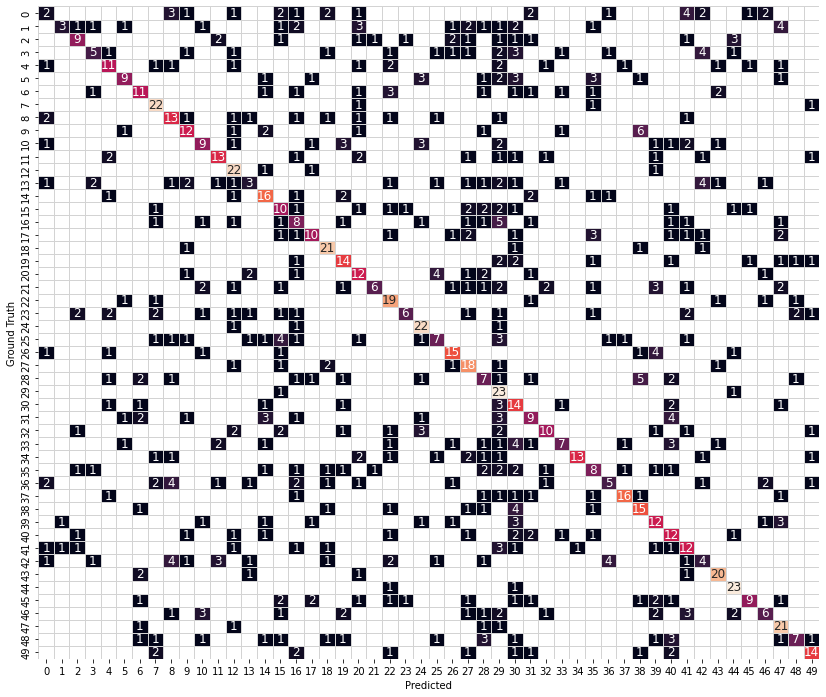

In [13]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)